# Tạo wordcloud với các hashtags từ các trang báo

## Lấy hashtags từ báo thanh niên

In [1]:
import matplotlib.pyplot as plt

from gazpacho import get, Soup
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
url = 'https://thanhnien.vn/tin-24h.html'
tn_news = get(url)
tn_soup = Soup(tn_news)

In [3]:
tn_hashtags = [hashtag.text for hashtag in tn_soup.find('a', {'class': 'hashtag'})]
tn_hashtags = [htag.replace(' ', '') for htag in tn_hashtags]
tn_hashtags = ' '.join(tn_hashtags)

In [4]:
tn_wordcloud = WordCloud().generate(tn_hashtags)

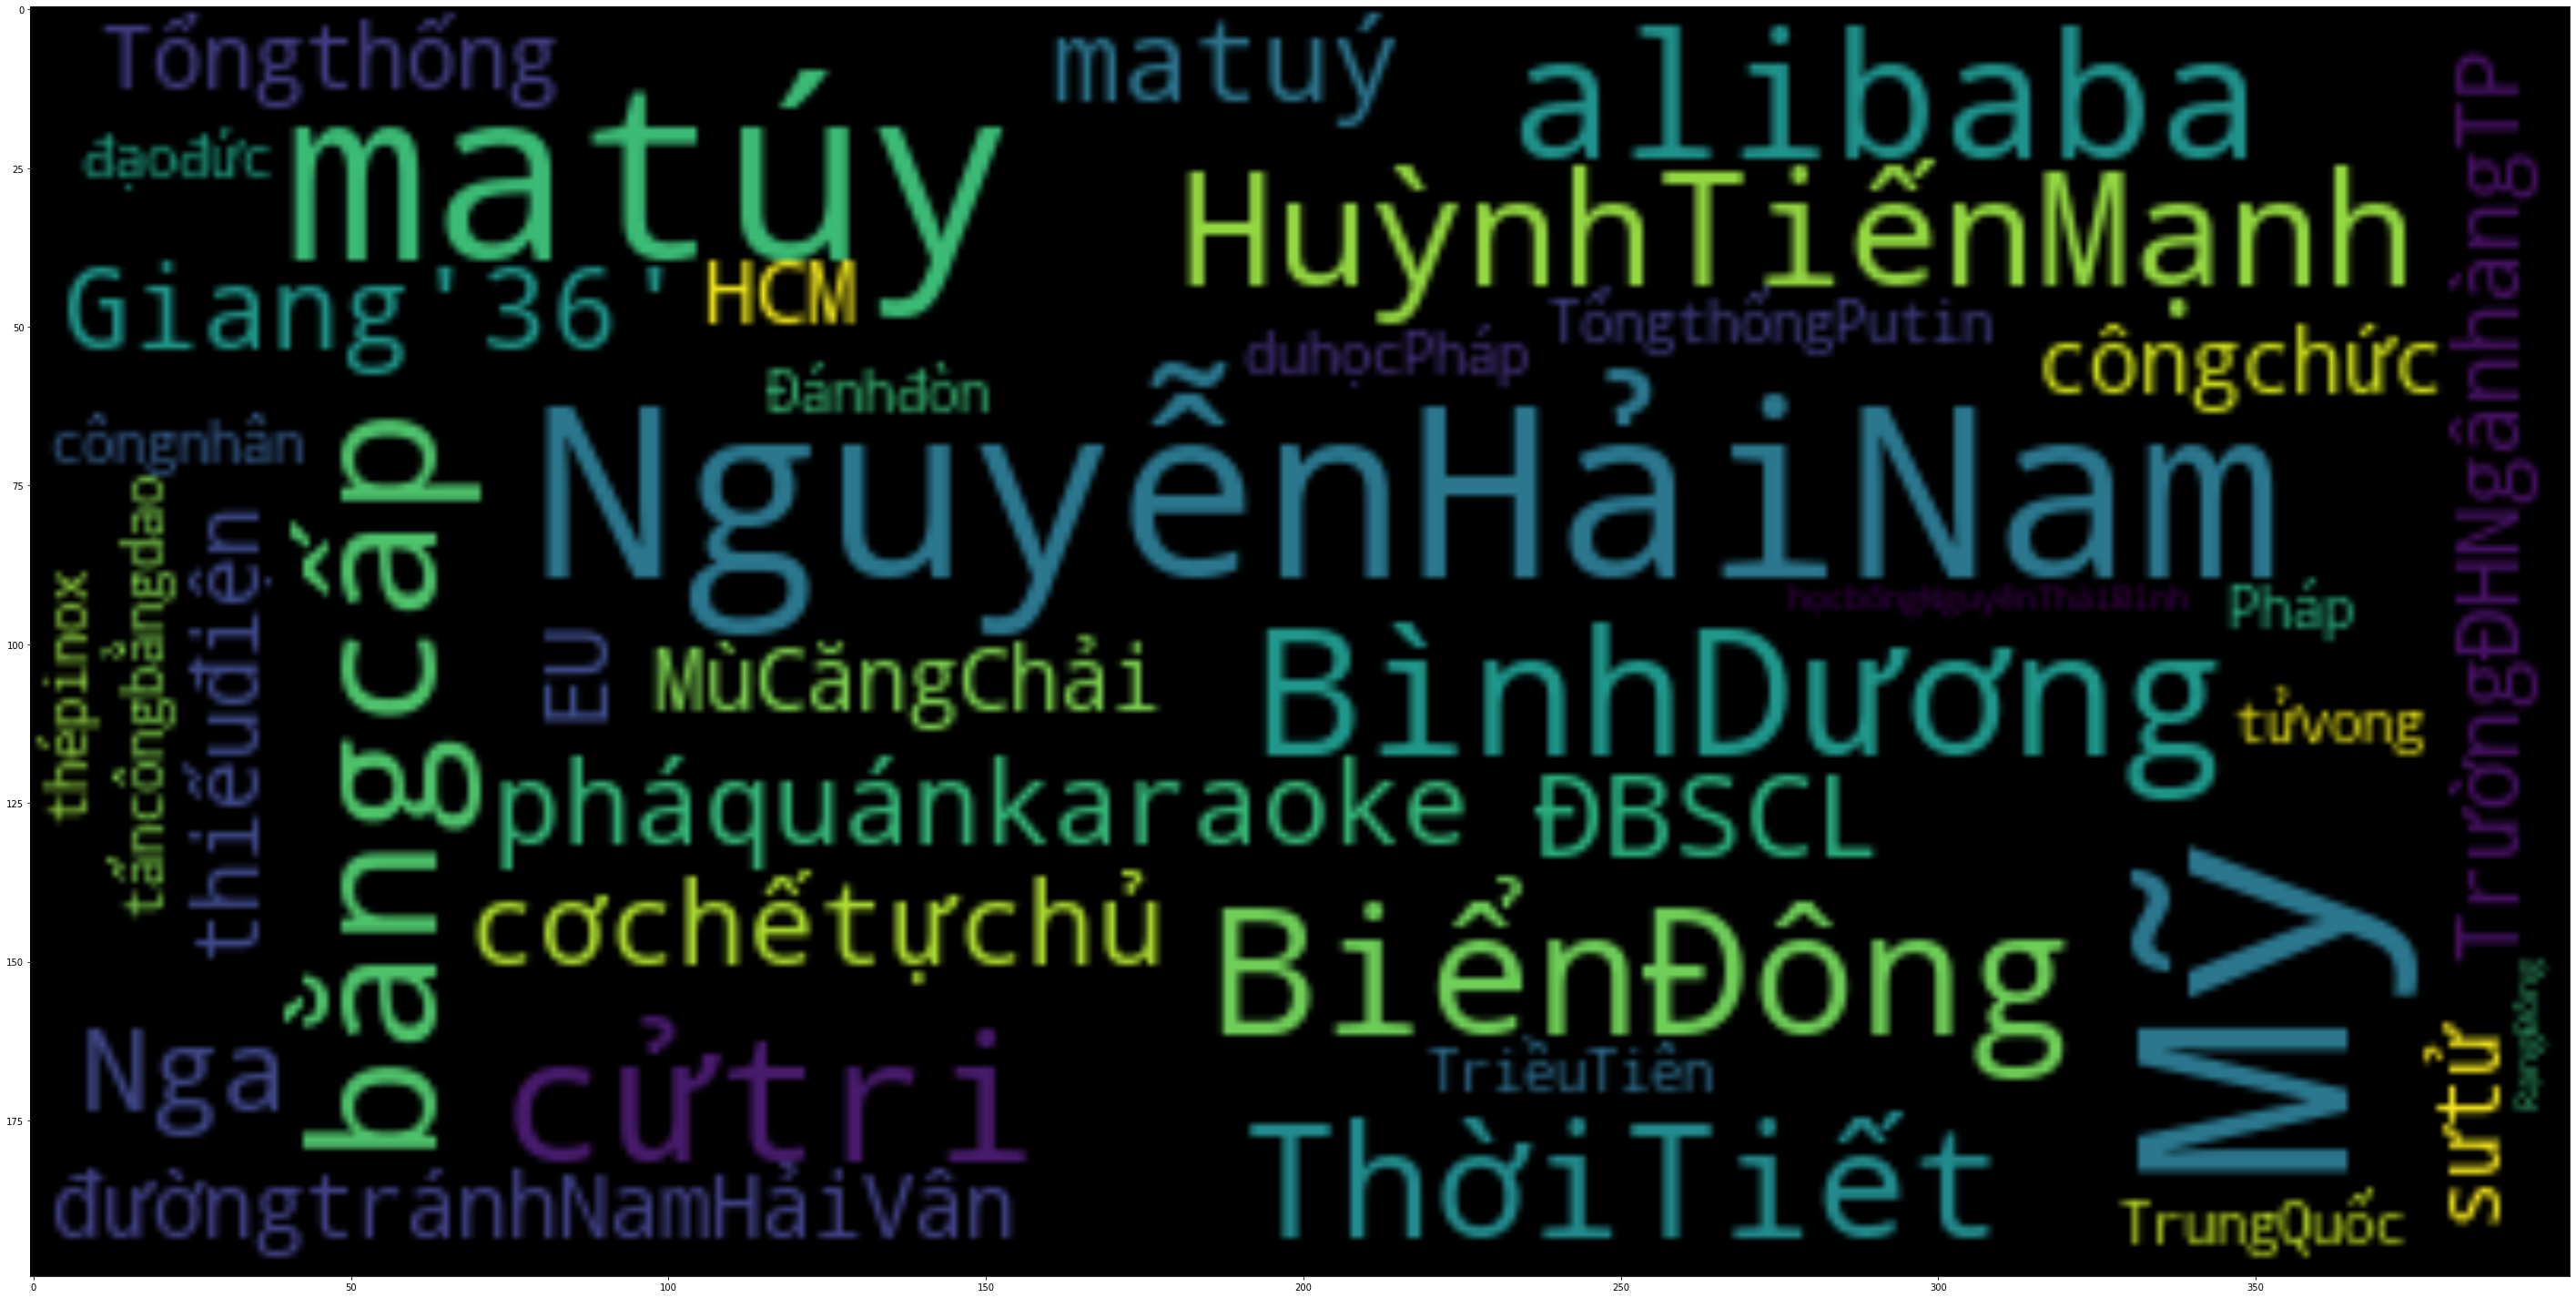

In [24]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.imshow(tn_wordcloud, interpolation='bilinear')

## Lấy hashtag từ báo tuổi trẻ

In [7]:
url = 'https://tuoitre.vn/tin-moi-nhat.htm'
tt_news = get(url)
tt_soup = Soup(tt_news)
titles = tt_soup.find('h3', {'class': 'title-news'})
links = [item.find('a').attrs['href'] for item in titles]

In [8]:
tt_tags = []
for link in links:
    url = ''.join(['https://tuoitre.vn', link])
    news = get(url)
    soup = Soup(news)
    li_tags = soup.find('li', {'class': 'tags-item'})
    try:
        # truong hop tim thay mot list cac hashtag
        tags = [tag.text for tag in li_tags]
    except TypeError:
        # truong hop chi tra ve 1 hashtag
        tags = [li_tags.text]
    
    tt_tags += tags

In [9]:
tt_tags = [tag.replace(' ', '') for tag in tt_tags]
tt_htags = ' '.join(tt_tags)
tt_wordcloud = WordCloud().generate(tt_htags)

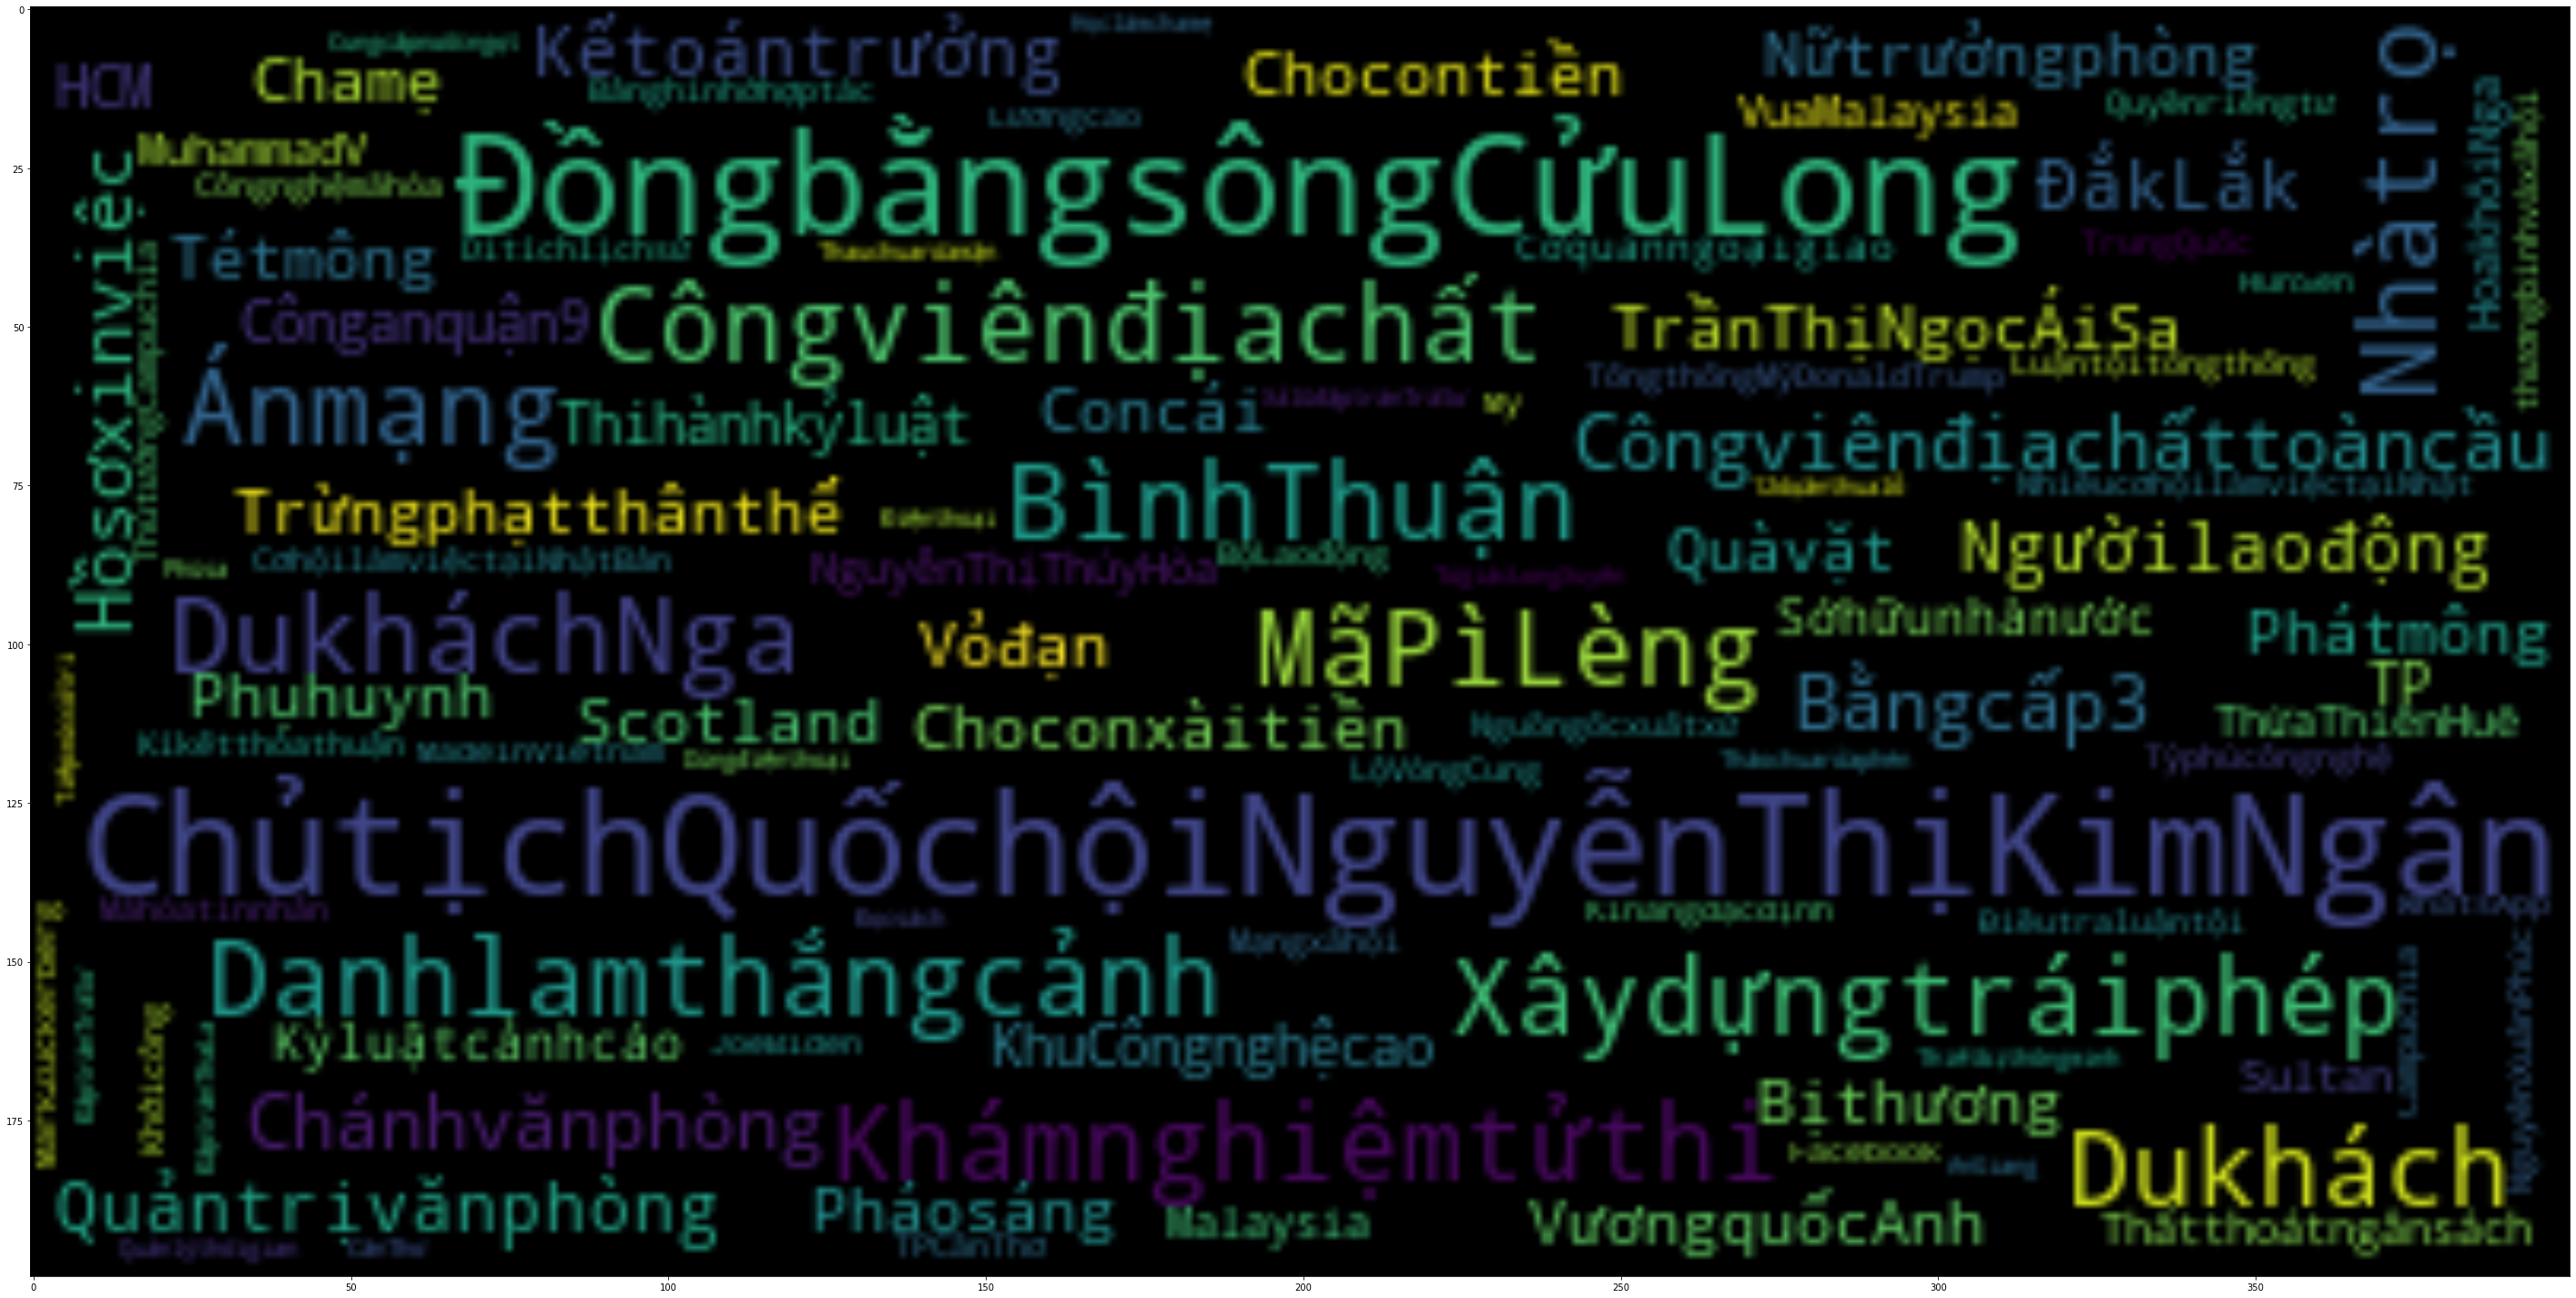

In [25]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.imshow(tt_wordcloud, interpolation='bilinear')

(-0.5, 399.5, 199.5, -0.5)

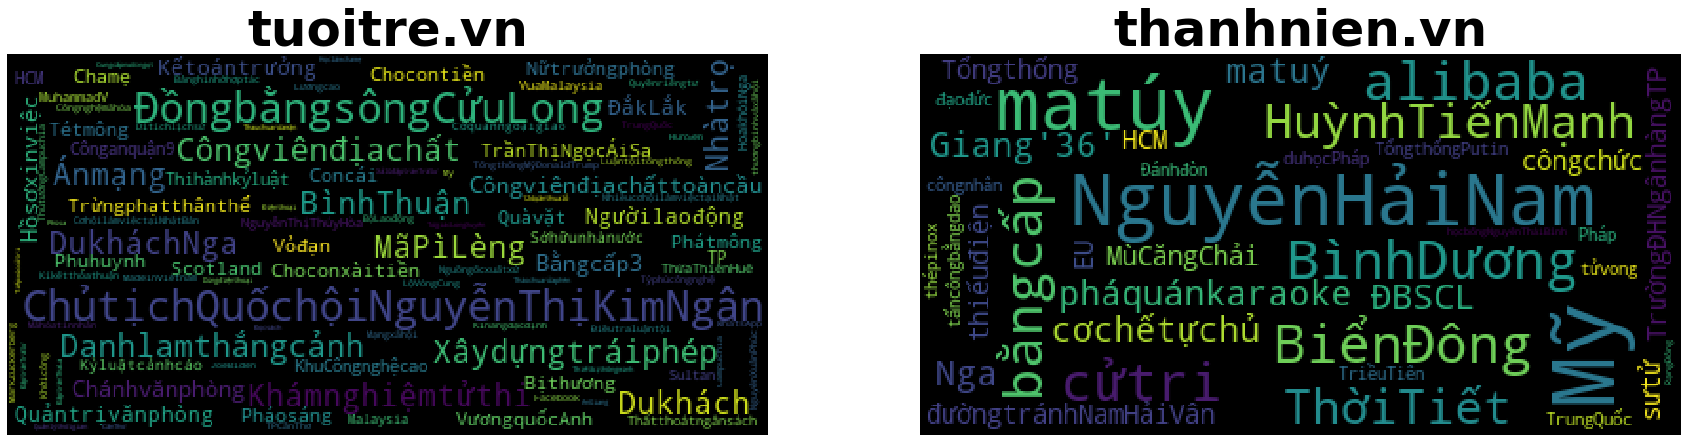

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].imshow(tt_wordcloud)
ax[0].set_title(label='tuoitre.vn', size=50, weight=600)
ax[0].axis('off')
ax[1].imshow(tn_wordcloud)
ax[1].set_title(label='thanhnien.vn', size=50, weight=600)
ax[1].axis('off')